## 從字庫裡面把字隨機挑出來組成二字詞或三字詞，然後強迫他們滿足Zipf's law，之後用這些滿足Zipf's law 的詞組成文本。把兩個不同alpha值的文本合在一起。

In [1]:
import random 
import bisect 
import math 
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from count import *
from zipfgen import ZipfGenerator
%matplotlib inline

In [2]:
def read_file_generate_fake(char_num = 2, out_file =  'fake1.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 15000, 
                            alpha = 1.00001, alpha2 = 1.001, noun = False):
    """Read "roc2.txt" file, and then generate a fake script satisfying Zipfs' law. All the words in 
    the output script share the same lenth char_num
    """
    SAMPLE_WORD_NUM = sample_word_num
    ALPHA = alpha
    ALPHA2 = alpha2
    NUM_WORD_IN_NOV = num_word_in_fake_scrip
    OUTPUT_FILE_NAME = out_file
    NOUN = noun
    CHAR_NUM = char_num
    
    zipf_gen_1 =  ZipfGenerator(SAMPLE_WORD_NUM,ALPHA)
    zipf_gen_2 =  ZipfGenerator(SAMPLE_WORD_NUM,ALPHA2)
    f =  open("roc2.txt","r")

    world_list = []
    
    for line in f:
        line_split = line.split("\t")
        if NOUN:
            if 'N' in line_split[4]:
                world_list.append(line_split[3])
        else:
            #if len(line_split[3]) == CHAR_NUM:
                world_list.append(line_split[3])

    f.close()
    
    for item in world_list:
        if item == " ":
            world_list.remove(item)
    #######################################
    #######these codes are optional######## 
    
    tmp_list = []
    for item in world_list:
        for e in list(item):
            tmp_list.append(e)
    random.shuffle(tmp_list)
    list_2 = []
    tmp = ''
    for e in tmp_list:
        tmp = tmp + e
        if len(tmp) == char_num:
            list_2.append(tmp)
            tmp = ''
    
    world_list = list_2

    print("words in a corpus: " ,len(world_list))
    
    ###########optional codes end##########
    #######################################


    print("A corpus is successfully loaded.")
    
    random.shuffle(world_list)
    small_world_list_1 = world_list[-SAMPLE_WORD_NUM:]
    random.shuffle(world_list)
    small_world_list_2 = world_list[-SAMPLE_WORD_NUM:]
    target_string_list = []

    for i in range(NUM_WORD_IN_NOV):
        if i % 2 == 0: 
            num = zipf_gen_1.next()
            w = small_world_list_1[num]
        else: 
            num = zipf_gen_2.next()
            w = small_world_list_2[num]                
        
        target_string_list.append(w+" ")
        
    f2 = open(OUTPUT_FILE_NAME , 'w')

    word_count = 0
    for item in target_string_list:
        if word_count < 20:
            f2.write(item)
            word_count += 1
        else:
            word_count = 0
            f2.write(item+"\n")
    f2.close()
    print("A fake script is successfully created !")
    print("--------------------")
    return None

## 改動不同的參數以產生你想要的文本
#### 參數解釋：
* char_num: 假文本裡面每個單詞的字數
* out_file: 輸出的假文本的檔名
* sample_word_num: zipf's law 的參數之一
* num_word_in_fake_scrip: 輸出的假文本總共有多少單詞
* alpha: Zipf's law 的參數之二
* noun: 只選roc2.txt(中研院詞庫)中的名詞與否

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


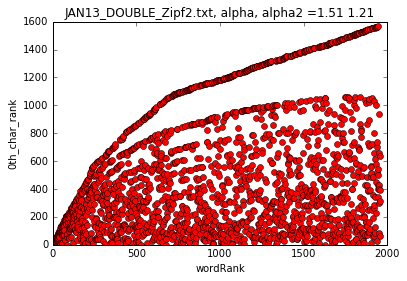

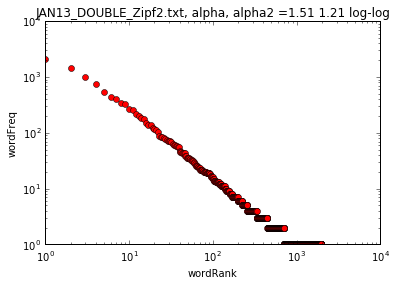

In [3]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 1.21

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

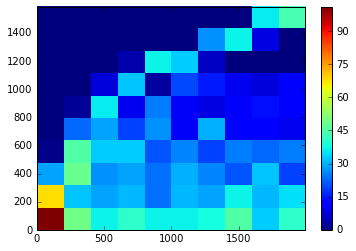

In [4]:
draw_density_plot(big, 10 )

In [5]:
print(check_const_ratio(big, feature= "wordRank", criteria = "wordFreq",max_range = 200))

wordRank  ratio:  [ 0.3685269   0.61800819  0.74834437  0.79351032  0.84758364  0.85087719
  0.89175258  0.9017341   0.94871795  0.93243243  0.92753623  0.9453125
  0.96694215  0.91452991  0.96261682  0.95145631  0.96938776  0.92631579
  0.95454545  0.94047619  0.93670886  0.97297297  0.98611111  0.98591549
  0.95714286  0.97014925]
std=  0.132546999847
[  1.98900000e+03   3.68526898e-01   6.18008186e-01   7.48344371e-01
   7.93510324e-01   8.47583643e-01   8.50877193e-01   8.91752577e-01
   9.01734104e-01   9.48717949e-01   9.32432432e-01   9.27536232e-01
   9.45312500e-01   9.66942149e-01   9.14529915e-01   9.62616822e-01
   9.51456311e-01   9.69387755e-01   9.26315789e-01   9.54545455e-01
   9.40476190e-01   9.36708861e-01   9.72972973e-01   9.86111111e-01
   9.85915493e-01   9.57142857e-01   9.70149254e-01   1.53846154e-02]


In [6]:
data = np.array([['','alpha1','alpha2',"sample_word_num","num_word_in_fake_scrip"],
                ['',ALPHA,ALPHA2,8000,20000],
                ])
para = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

In [7]:
write_to_excel(big,word,char,para,"DPLJAN18.xlsx")

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


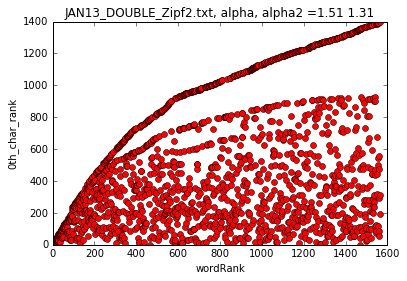

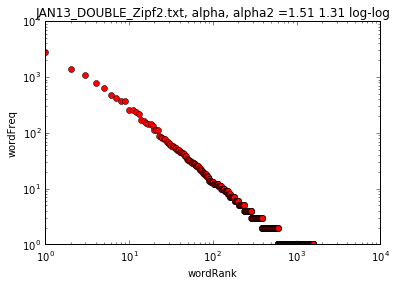

In [4]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 1.31

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


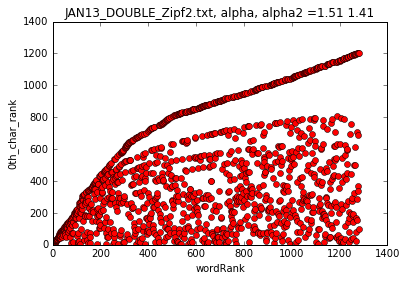

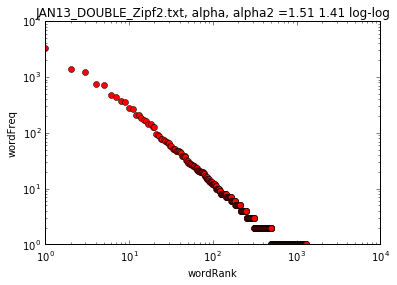

In [5]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 1.41

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


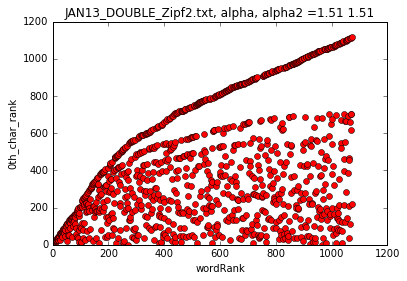

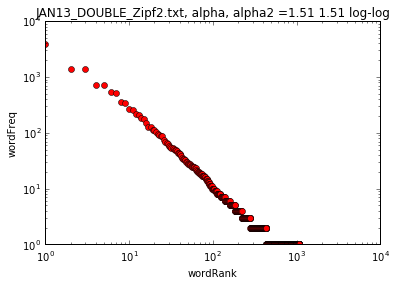

In [6]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 1.51

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


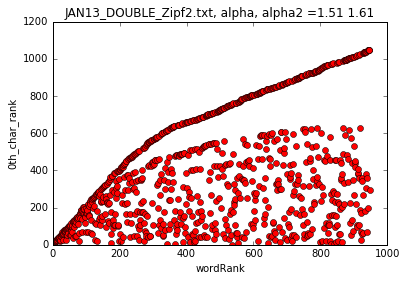

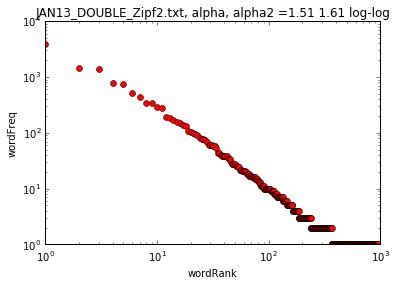

In [7]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 1.61

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


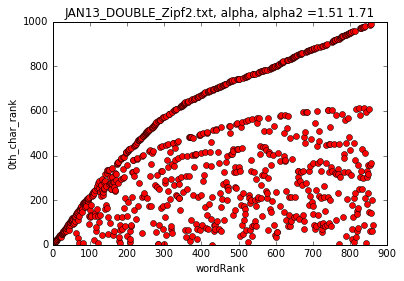

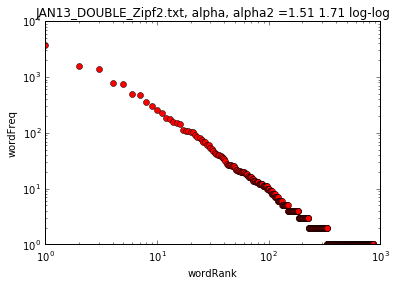

In [8]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 1.71

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


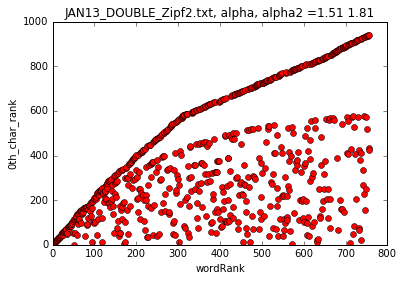

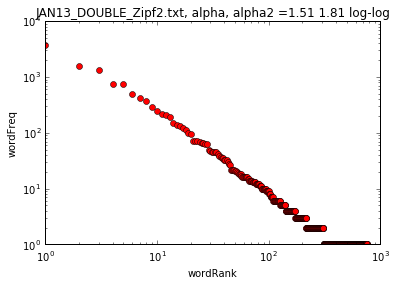

In [10]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 1.81

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


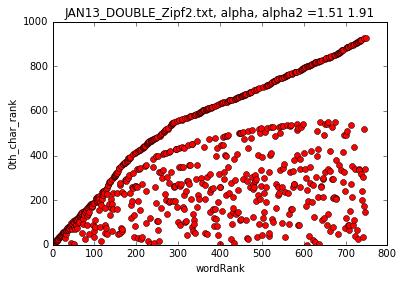

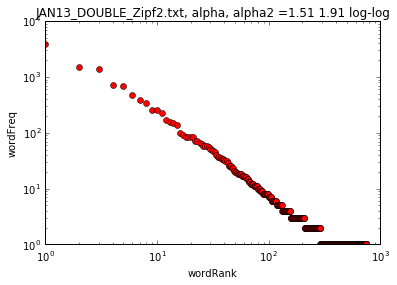

In [11]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 1.91

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


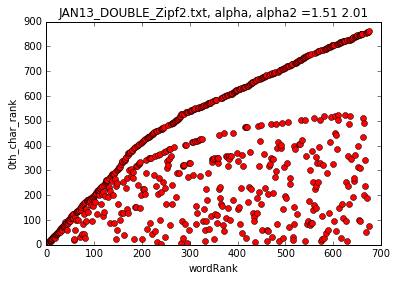

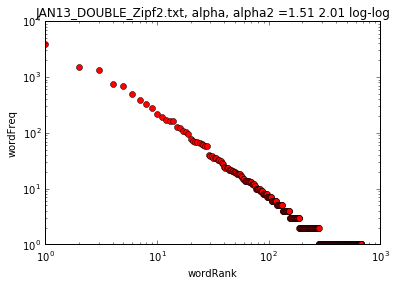

In [12]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 2.01

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


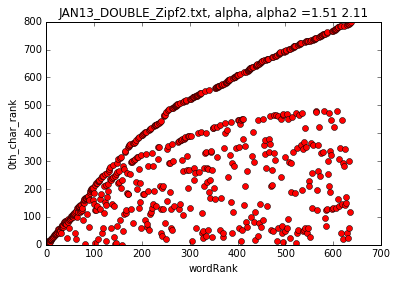

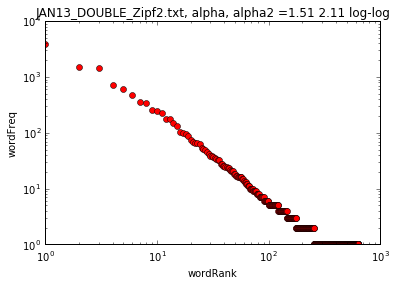

In [13]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 2.11

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


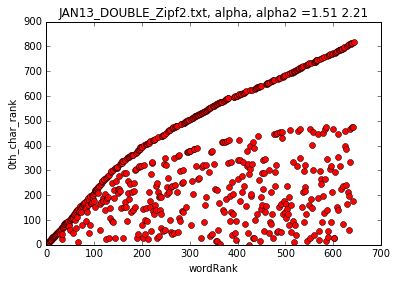

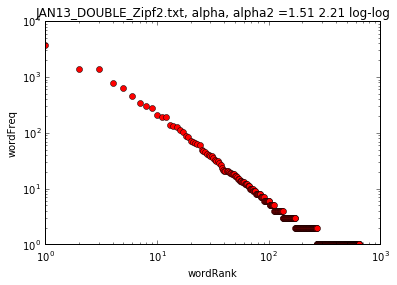

In [14]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 2.21

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


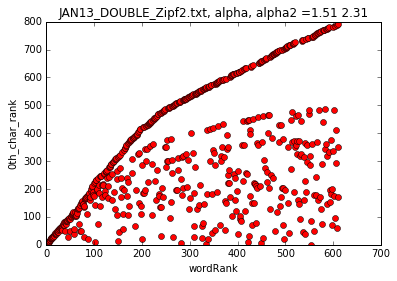

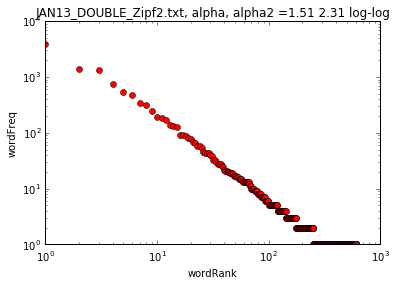

In [15]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 2.31

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


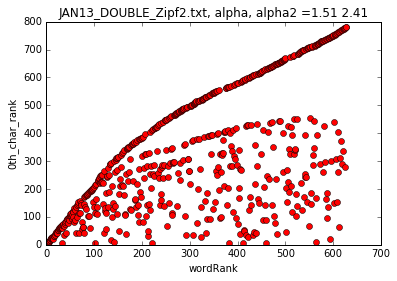

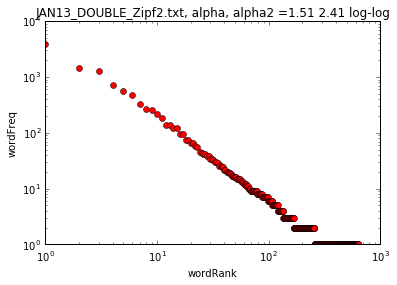

In [16]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.51
ALPHA2 = 2.41

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))